<a href="https://colab.research.google.com/github/Edugera/ENERGIA/blob/master/Alg_Fluxo_Dinheiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição: este programa usa o índice de fluxo de dinheiro para determinar quando comprar e vender ações

In [ ]:
!pip install yfinance
!pip install TA-Lib

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d6d78c7884216c1223081748c9ba2c58dc5fad5750e0d4183e105480e3ed2a2c
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance
     |████████████████████████████████| 276kB 2.7MB/s 
  ERROR: Failed building wheel for TA-Lib
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-msc3i2x9/TA-Lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-msc3i2x9/TA-Lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-iwcg5wje/install-record.txt --single-version-externally-managed --compile

In [ ]:
# Importe as bibliotecas
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

In [ ]:
yf_prices = yf.download(['AAPL', 'MSFT', 'GOOG', 'FB'], start='2018-01-01')

[*********************100%***********************]  4 of 4 completed


In [ ]:
prices = yf_prices['Adj Close']['AAPL']
rs = prices.apply(np.log).diff(1).fillna(0)

In [ ]:
rs

Date
2018-01-02    0.000000
2018-01-03   -0.000174
2018-01-04    0.004634
2018-01-05    0.011321
2018-01-08   -0.003721
                ...   
2020-09-28    0.023588
2020-09-29   -0.007597
2020-09-30    0.014963
2020-10-01    0.008427
2020-10-02   -0.032813
Name: AAPL, Length: 694, dtype: float64

In [ ]:
yf_pricesA = yf.download(['AAPL'], start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = yf_pricesA
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200
...,...,...,...,...,...,...
2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400
2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200
2020-09-30,113.790001,117.260002,113.620003,115.809998,115.809998,142675200


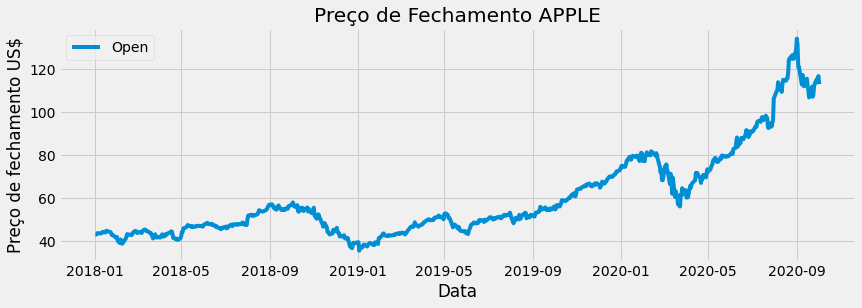

In [ ]:
# Mostre visualmente os dados
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close Price')
plt.title('Preço de Fechamento APPLE')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento US$')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [ ]:
# Calcule o preço típico
typical_price = (df['Close'] + df['High'] + df['Low'])/3
typical_price

Date
2018-01-02     42.818333
2018-01-03     43.228334
2018-01-04     43.215000
2018-01-05     43.618333
2018-01-08     43.657500
                 ...    
2020-09-28    114.353333
2020-09-29    114.323331
2020-09-30    115.563334
2020-10-01    116.780001
2020-10-02    113.536667
Length: 694, dtype: float64

In [ ]:
# pegue o período
period = 14

#calcule o fluxo de dinheiro
money_flow = typical_price * df['Volume']
money_flow

Date
2018-01-02    4.377044e+09
2018-01-03    5.104039e+09
2018-01-04    3.878045e+09
2018-01-05    4.128039e+09
2018-01-08    3.591755e+09
                  ...     
2020-09-28    1.574330e+10
2020-09-29    1.136170e+10
2020-09-30    1.648802e+10
2020-10-01    1.356054e+10
2020-10-02    1.638458e+10
Length: 694, dtype: float64

In [ ]:
# Obtenha todo o fluxo de dinheiro positivo e negativo
positive_flow = []
negative_flow = []

# Percorra o preço normal
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [ ]:
# Obtenha todo o fluxo de dinheiro positivo e negativo dentro do período de tempo
positive_mf = []
negative_mf = []

for i in range (period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1- period : i+1]) )
for i in range (period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1- period : i+1]))

In [ ]:
# Calcule o índice do fluxo do dinheiro
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([62.93199971, 54.90032908, 51.87422075, 44.21926488, 37.23681319,
       34.94933987, 42.42418294, 43.28124881, 37.42329716, 29.32770501,
       33.5321873 , 36.42259919, 35.55617158, 34.71411466, 37.98781019,
       44.54477553, 50.18834461, 55.86218221, 61.97985661, 62.77468306,
       57.38860959, 57.74046634, 63.45613619, 73.40567841, 72.22173191,
       64.36553572, 65.33968998, 65.31550563, 63.80885075, 61.92284033,
       56.8352141 , 56.26172661, 53.90949185, 61.52154569, 61.52863531,
       54.32537656, 54.27152348, 48.24030735, 39.78403211, 47.6091722 ,
       49.64744357, 51.09300951, 41.95048557, 43.32302101, 42.12342415,
       34.52442473, 36.69683525, 29.55060465, 36.79420278, 43.10976831,
       43.51916808, 43.21839708, 50.827088  , 50.29167357, 49.4250034 ,
       55.64806402, 62.83741973, 61.65418871, 68.94701852, 71.08593357,
       64.32560817, 64.73948856, 51.96591059, 44.42024968, 44.15115954,
       50.48499736, 43.19044873, 43.83622874, 51.9374713 , 55.00

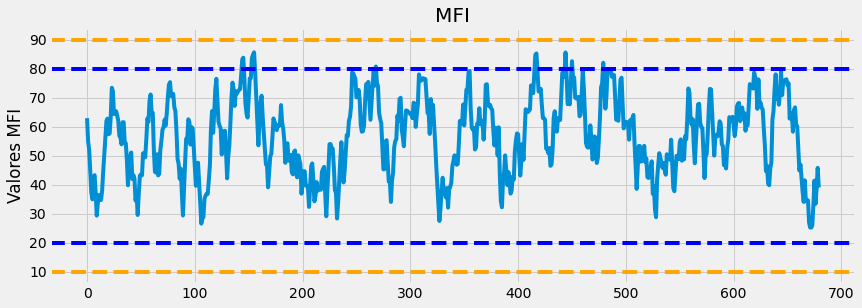

In [ ]:
# Mostre visualmente o o mfi
df2 = pd.DataFrame()
df2['MFI'] = mfi

# Crie o enredo
plt.figure(figsize=(12.2,4.5))
plt.plot(df2['MFI'],label='MFI')
plt. axhline(10, linestyle= '--', color = 'orange')
plt. axhline(20, linestyle= '--', color = 'blue')
plt. axhline(80, linestyle= '--', color = 'blue')
plt. axhline(90, linestyle= '--', color = 'orange')
plt.title('MFI')
plt.ylabel('Valores MFI')
plt.show()


In [ ]:
# Crie um novo data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [ ]:
# Mostre o novo data frame
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2018-01-23,44.325001,44.860001,44.205002,44.259998,42.665524,130756400,62.932000
2018-01-24,44.312500,44.325001,43.299999,43.555000,41.985931,204420400,54.900329
2018-01-25,43.627499,43.737499,42.632500,42.777500,41.236435,166116000,51.874221
2018-01-26,43.000000,43.000000,42.514999,42.877499,41.332829,156572000,44.219265
2018-01-29,42.540001,42.540001,41.767502,41.990002,40.477306,202561600,37.236813
...,...,...,...,...,...,...,...
2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400,41.396136
2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200,33.396362
2020-09-30,113.790001,117.260002,113.620003,115.809998,115.809998,142675200,38.831163


In [ ]:
# Crie uma função que mostre os sinais de compra e venda
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append (data['Close'][i])
    elif (data['MFI'][i]) < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [58]:
# Adicione nova coluna (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 90, 30)[0]
new_df['Sell'] = get_signal(new_df, 80, 30)[1]

# Mostre os dados
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2018-01-23,44.325001,44.860001,44.205002,44.259998,42.665524,130756400,62.932000,NaN,NaN
2018-01-24,44.312500,44.325001,43.299999,43.555000,41.985931,204420400,54.900329,NaN,NaN
2018-01-25,43.627499,43.737499,42.632500,42.777500,41.236435,166116000,51.874221,NaN,NaN
2018-01-26,43.000000,43.000000,42.514999,42.877499,41.332829,156572000,44.219265,NaN,NaN
2018-01-29,42.540001,42.540001,41.767502,41.990002,40.477306,202561600,37.236813,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400,41.396136,NaN,NaN
2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200,33.396362,NaN,NaN
2020-09-30,113.790001,117.260002,113.620003,115.809998,115.809998,142675200,38.831163,NaN,NaN


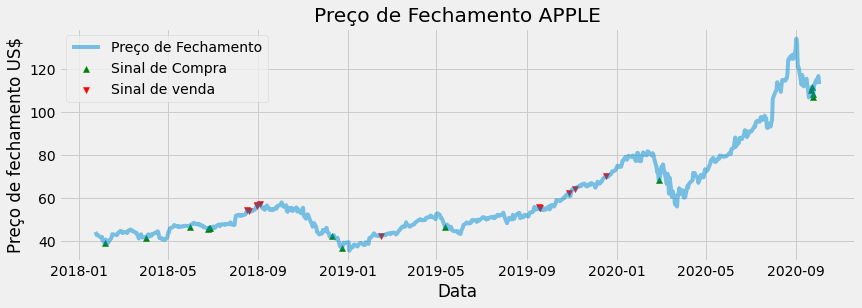

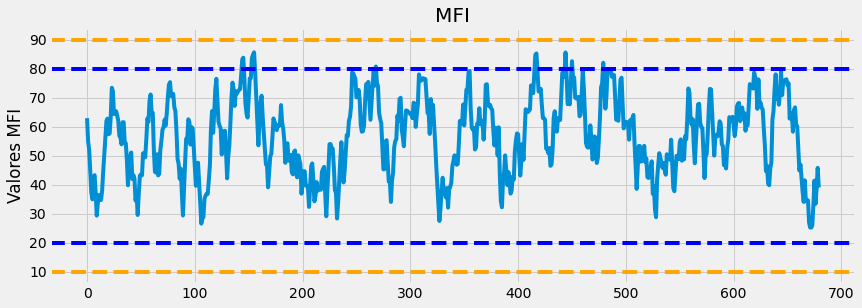

In [59]:
# Plote os dados
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = 'Preço de Fechamento', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label = 'Sinal de Compra', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label = 'Sinal de venda', marker = 'v', alpha = 1)
plt.title('Preço de Fechamento APPLE')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento US$')
plt.legend(loc='upper left')
plt.show()

# Mostre visualmente o o mfi
df2 = pd.DataFrame()
df2['MFI'] = mfi

# Crie o enredo
plt.figure(figsize=(12.2,4.5))
plt.plot(df2['MFI'],label='MFI')
plt. axhline(10, linestyle= '--', color = 'orange')
plt. axhline(20, linestyle= '--', color = 'blue')
plt. axhline(80, linestyle= '--', color = 'blue')
plt. axhline(90, linestyle= '--', color = 'orange')
plt.title('MFI')
plt.ylabel('Valores MFI')
plt.show()
